In [1]:
# read in, plot and animate frequency dependent modulus for GIA paper # 1, Low hanging fruit. 

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
Modulus_data_name = 'GIA_M_freq.txt'

Mod_f_mat = np.loadtxt(Modulus_data_name) 
dims = Mod_f_mat.shape
print(dims)

TauMax_data_name = 'TauMax_data.txt'

TauMax_f_mat = np.loadtxt(TauMax_data_name) 
dims = TauMax_f_mat.shape
print(dims)

freq_vec_name = 'VBR_freqs.txt'
freq_vec = np.loadtxt(freq_vec_name)
print(1/freq_vec)

(114, 30)
(114, 5)
[  1.00000000e+12   7.88046284e+11   6.21016953e+11   4.89390096e+11
   3.85662042e+11   3.03919535e+11   2.39502664e+11   1.88739182e+11
   1.48735212e+11   1.17210230e+11   9.23670886e+10   7.27895382e+10
   5.73615258e+10   4.52035364e+10   3.56224790e+10   2.80721620e+10
   2.21221627e+10   1.74332883e+10   1.37382380e+10   1.08263673e+10
   8.53167851e+09   6.72335757e+09   5.29831697e+09   4.17531897e+09
   3.29034454e+09   2.59294381e+09   2.04335973e+09   1.61026203e+09
   1.26896101e+09   1.00000000e+09]


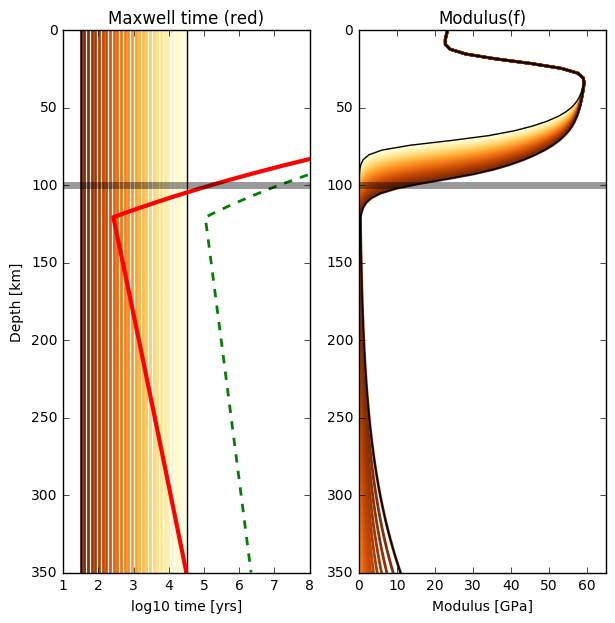

In [29]:
# Make a new figure

# plasma colormap
cmap = plt.cm.get_cmap('YlOrBr')
num_freqs = Mod_f_mat.shape[1] 

z_km = np.linspace(0,350,dims[0])

# =======================
f, axs = plt.subplots(1,2,figsize=(7,7))
plt.subplot(1, 2, 1)

for i_freq,freq in enumerate(freq_vec):
    color_num = i_freq/float(num_freqs)
    col = cmap(color_num)
    time_line = np.log10((1/freq)/(np.pi*1e7))*np.ones(len(z_km))
    plt.plot(time_line,z_km,color=col,lw=2.0 )

time_line = np.log10((1/freq_vec[0])/(np.pi*1e7))*np.ones(len(z_km))
plt.plot(time_line,z_km,color=bk,lw=1.0 )
time_line = np.log10((1/freq_vec[-1])/(np.pi*1e7))*np.ones(len(z_km))
plt.plot(time_line,z_km,color=bk,lw=1.0 )
    
TauMax_diff =  TauMax_f_mat[:,3]   
TauMax_tot =  TauMax_f_mat[:,4]  

plt.plot(np.log10(TauMax_diff/(np.pi*1e7)),z_km,color='green',lw=2.0, ls='--' )
plt.plot(np.log10(TauMax_tot/(np.pi*1e7)),z_km,color='red',lw=3.0 )

axes = plt.gca()
xmin = 1.0
xmax = 8.0
axes.set_xlim([xmin,xmax])

# add plate thickness line: 
zLAB = 100 
zLAB_line = zLAB*np.ones(len(z_km))
plt.plot(np.linspace(xmin,xmax,len(z_km)),zLAB_line,color='black',lw=5.0, alpha=0.4)

plt.gca().invert_yaxis()
plt.title('Maxwell time (red)')
plt.xlabel('log10 time [yrs]')
plt.ylabel('Depth [km]')    

# =======================
plt.subplot(1, 2, 2)
#plt.figure(figsize=(5,10))

for i_freq in range(num_freqs):
    color_num = i_freq/float(num_freqs)
    col = cmap(color_num)
    m_f = (Mod_f_mat[:,i_freq])/1e9
    plt.plot(m_f,z_km,color=col,lw=2.0 )
    
m_f = (Mod_f_mat[:,0])/1e9
bk = [0.0,0.0,0.0,1.0]
plt.plot(m_f,z_km,color=bk,lw=1.0 )

m_f = (Mod_f_mat[:,num_freqs-1])/1e9
bk = [0.0,0.0,0.0,1.0]
plt.plot(m_f,z_km,color=bk,lw=1.0 )

axes = plt.gca()
xmin = 0.0
xmax = 65.0
axes.set_xlim([xmin,xmax])


plt.plot(np.linspace(xmin,xmax,len(z_km)),zLAB_line,color='black',lw=5.0, alpha=0.4)


plt.gca().invert_yaxis()
plt.title('Modulus(f)')
plt.xlabel('Modulus [GPa]')
plt.ylabel('')

plt.show()


# plt.colorbar()
#plt.tight_layout()